In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Data Preprocessing

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras

#### FASHION-MNIST

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
indices = np.random.choice(range(X_train.shape[0]), 10000)

In [5]:
X_train = X_train[indices]
y_train = y_train[indices]

In [6]:
num_classes = 10
input_shape = (28, 28, 1)
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
def my_flatten(x):
    a = []
    for xi in x:
        a.append(xi.flatten())
    return np.array(a)

In [8]:
# flatten x_train, x_test
X_train = my_flatten(X_train)
X_test = my_flatten(X_test)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [11]:
display(X_train.head()), display(y_train.head())

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.01,-0.031196,-0.07609,-0.046302,-0.066476,-0.078437,-0.103341,-0.159373,-0.240661,-0.369287,...,0.100566,-0.476139,-0.398265,-0.404534,-0.432652,-0.381049,-0.293717,-0.151922,-0.088706,-0.029365
1,-0.01,-0.031196,-0.07609,-0.046302,-0.066476,-0.078437,-0.103341,-0.159373,-0.240661,-0.369287,...,-0.601173,-0.476139,-0.398265,-0.404534,-0.451699,-0.402734,-0.293717,-0.151922,-0.088706,-0.029365
2,-0.01,-0.031196,-0.07609,-0.046302,-0.066476,-0.078437,-0.103341,-0.159373,-0.240661,-0.369287,...,-0.601173,-0.476139,-0.398265,-0.404534,-0.451699,-0.402734,-0.293717,-0.151922,-0.088706,-0.029365
3,-0.01,-0.031196,-0.07609,-0.046302,0.217610,-0.078437,-0.103341,-0.159373,0.606348,1.421185,...,-0.601173,-0.156326,0.062933,0.364572,-0.185039,-0.402734,-0.293717,-0.151922,-0.088706,-0.029365
4,-0.01,-0.031196,-0.07609,-0.046302,-0.066476,-0.078437,-0.103341,-0.159373,-0.240661,-0.369287,...,-0.566942,-0.476139,-0.398265,-0.404534,-0.451699,-0.402734,-0.293717,-0.151922,-0.088706,-0.029365


,0
0,6
1,7
2,7
3,0
4,9


(None, None)

## t-SNE

In [12]:
from model import TSNE

In [13]:
def visualize(df):
    plt.figure(figsize=(10,10))
    sb.scatterplot(data=df, hue='class', x='dim1', y='dim2')
    plt.show()

#### 2-D, perplexity=50, learning_rate=200

In [14]:
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
X_TSNE = pd.DataFrame(tsne.fit_transform(X_train))

In [15]:
X_TSNE = X_TSNE.rename(columns={0:'dim1', 1:'dim2'})
Y = y_train.rename(columns={0:'class'})
df_TSNE = pd.concat([X_TSNE, Y], axis=1)

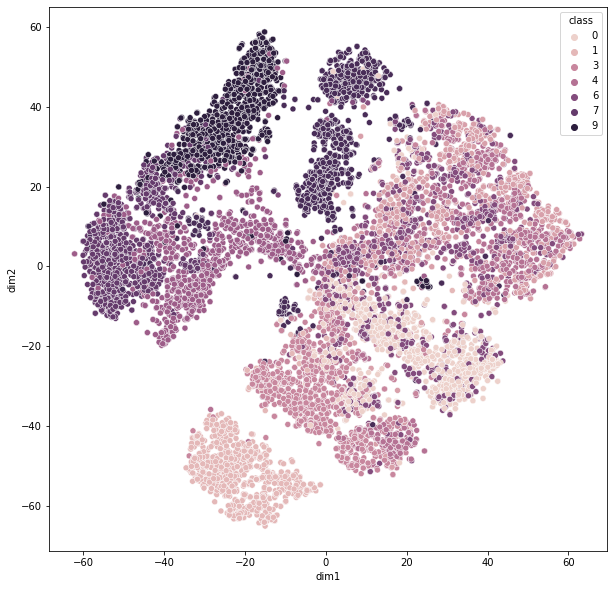

In [16]:
visualize(df_TSNE)

#### 2-D, perplexity=10, learning_rate=200

In [37]:
tsne = TSNE(n_components=2, perplexity=10, learning_rate=200)
X_TSNE = pd.DataFrame(tsne.fit_transform(X_train))

In [38]:
X_TSNE = X_TSNE.rename(columns={0:'dim1', 1:'dim2'})
Y = y_train.rename(columns={0:'class'})
df_TSNE = pd.concat([X_TSNE, Y], axis=1)

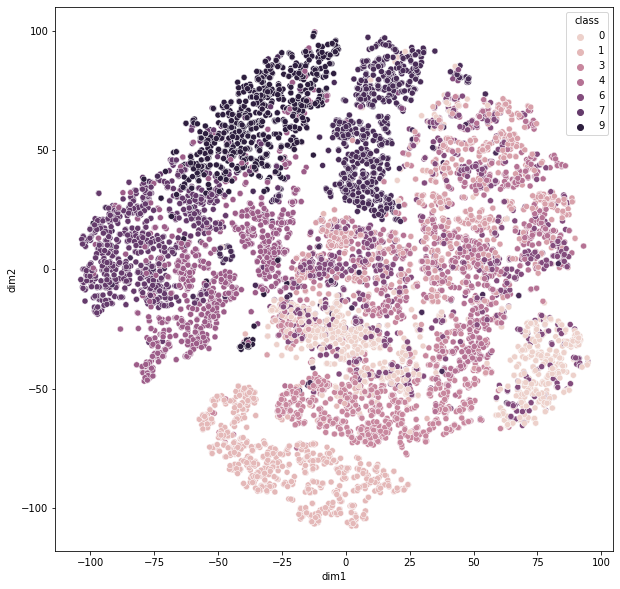

In [39]:
visualize(df_TSNE)

#### 2-D, perplexity=50, learning_rate=200, n_iter=2000

In [41]:
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=2000)
X_TSNE = pd.DataFrame(tsne.fit_transform(X_train))

In [42]:
X_TSNE = X_TSNE.rename(columns={0:'dim1', 1:'dim2'})
Y = y_train.rename(columns={0:'class'})
df_TSNE = pd.concat([X_TSNE, Y], axis=1)

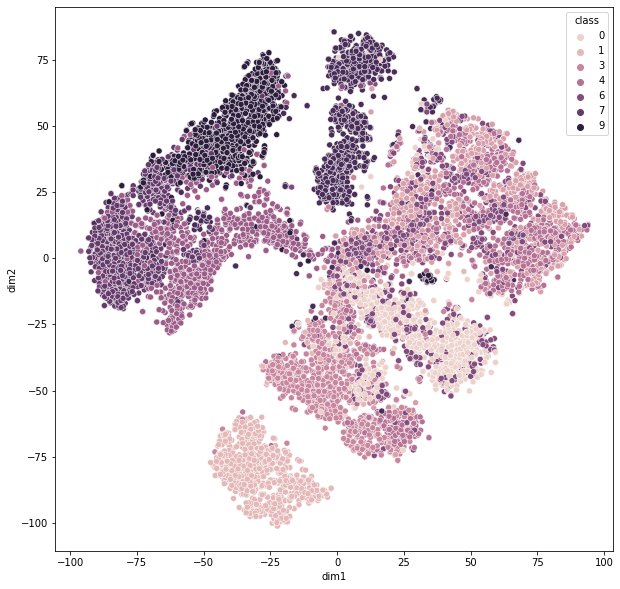

In [43]:
visualize(df_TSNE)

In [17]:
num_neighbors = 50

## PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_train))

In [20]:
X_pca = X_pca.rename(columns={0:'dim1', 1:'dim2'})
df_pca = pd.concat([X_pca, Y], axis=1)

In [21]:
df_pca.head()

,dim1,dim2,class
0,0.256463,-9.405911,6
1,-12.563848,10.328510,7
2,-15.934145,4.983773,7
3,1.781689,-4.105460,0
4,5.292451,16.291012,9


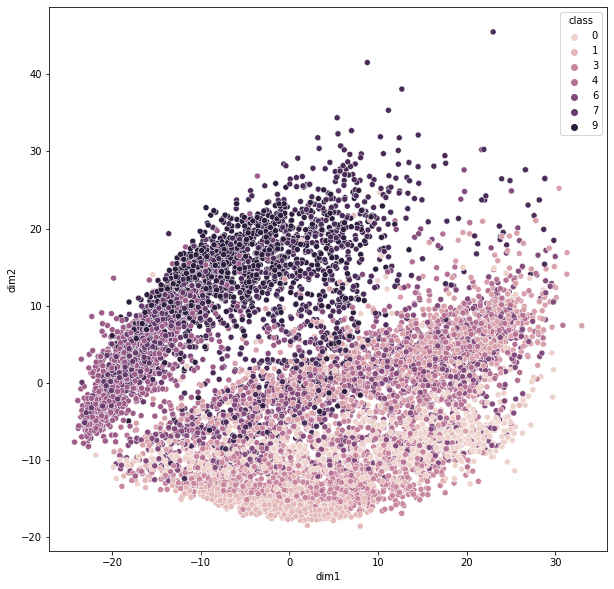

In [22]:
visualize(df_pca)

## Isomap

In [23]:
from sklearn.manifold import Isomap

In [24]:
isomap = Isomap(n_neighbors = num_neighbors, n_components=2)
X_isomap = pd.DataFrame(isomap.fit_transform(X_train))

In [25]:
X_isomap = X_isomap.rename(columns={0:'dim1', 1:'dim2'})
df_isomap = pd.concat([X_isomap, Y], axis=1)

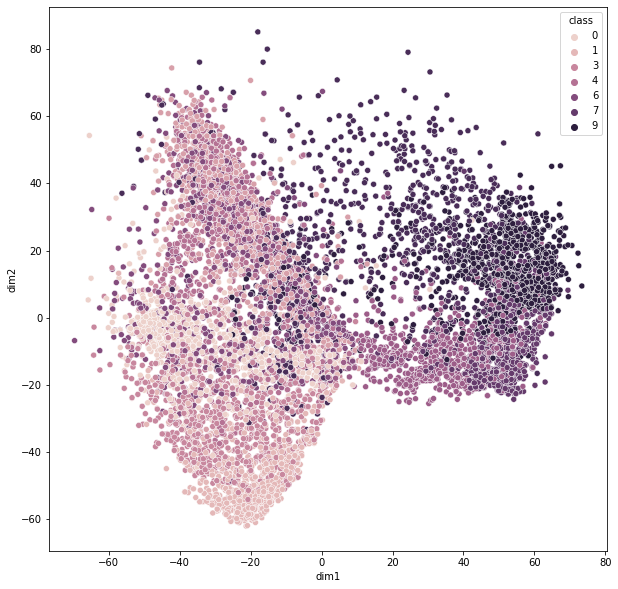

In [26]:
visualize(df_isomap)

## LLE

In [27]:
from sklearn.manifold import LocallyLinearEmbedding

In [28]:
lle = LocallyLinearEmbedding(n_neighbors = num_neighbors, n_components=2)
X_lle = pd.DataFrame(lle.fit_transform(X_train))

In [29]:
X_lle = X_lle.rename(columns={0:'dim1', 1:'dim2'})
df_lle = pd.concat([X_lle, Y], axis=1)

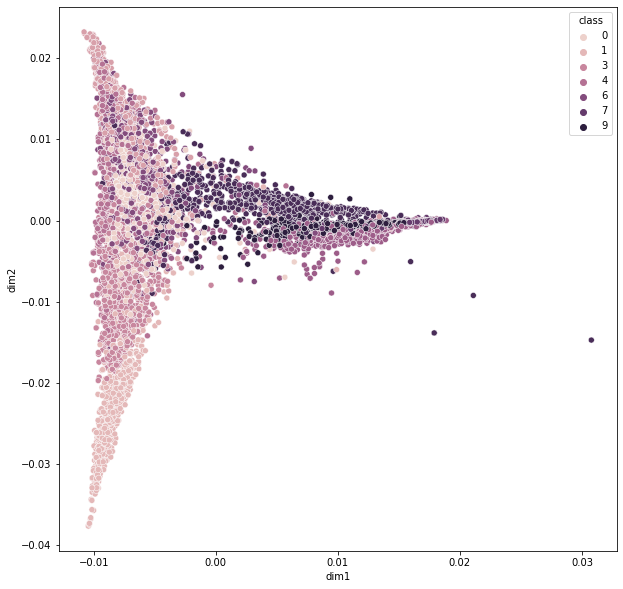

In [30]:
visualize(df_lle)